### Exploratory

In [135]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [136]:
tracts_2010 = gpd.read_file("./raw_data/census_tracts/fl_2010_t_bound/fl_2010_t_bound.shp")
tracts_2020 = gpd.read_file("./raw_data/census_tracts/fl_t_2020_bound/fl_t_2020_bound.shp")
pl_2010 = pd.read_csv("./raw_data/census_tracts/fl_pl2010_t/fl_pl2010_t.csv")
pl_2020 = pd.read_csv("./raw_data/census_tracts/fl_pl2020_t/fl_pl2020_t.csv")

In [137]:
pl_2020['GEOID20'] = pl_2020['GEOID'].str[-11:]


### 2010

In [138]:
tracts_2010 = tracts_2010[tracts_2010['COUNTY'] == 'Putnam County']

In [139]:
pl_2010 = pl_2010[pl_2010['COUNTY'] == 107]
pl_2010['TRACT'] = pl_2010['TRACT'].astype(str).str.zfill(6)

In [140]:
len(pl_2010['TRACT'].unique()) == tracts_2010.shape[0]

True

In [141]:
# black alone or in combination (32 categories)
black_demo_cols = ['P0010004', 'P0010011', 'P0010016', 'P0010017', 'P0010018', 'P0010019', 'P0010027', 'P0010028', 'P0010029', 'P0010030', \
'P0010037', 'P0010038', 'P0010039', 'P0010040', 'P0010041', 'P0010042',  'P0010048', 'P0010049', 'P0010050', 'P0010051', \
'P0010052', 'P0010053', 'P0010058', 'P0010059', 'P0010060', 'P0010061', 'P0010064', 'P0010065', 'P0010066', 'P0010067', 'P0010069', 'P0010071']

pl_2010['abpop'] = pl_2010[black_demo_cols].sum(axis=1)

nh_black_demo_cols = ['P0020006', 'P0020013', 'P0020018', 'P0020019', 'P0020020', 'P0020021', 'P0020029', 'P0020030', 'P0020031', 'P0020032', \
'P0020039', 'P0020040', 'P0020041', 'P0020042', 'P0020043', 'P0020044',  'P0020050', 'P0020051', 'P0020052', 'P0020053', \
'P0020054', 'P0020055', 'P0020060', 'P0020061', 'P0020062', 'P0020063', 'P0020066', 'P0020067', 'P0020068', 'P0020069', 'P0020071', 'P0020073']

# hispanic or latino (not enumerated as black)
pl_2010['hpop'] = pl_2010['P0020002'] - ( 
  pl_2010[black_demo_cols].sum(axis=1) \
  - pl_2010[nh_black_demo_cols].sum(axis=1)
)

nh_asian_demo_cols = ['P0020008', 'P0020015', 'P0020022' , 'P0020025', 'P0020026', 'P0020033', 'P0020036', 'P0020037', 'P0020045',\
  'P0020046','P0020048','P0020056','P0020057','P0020059','P0020064', 'P0020070',\
    'P0020009', 'P0020016', 'P0020023', 'P0020027', 'P0020034', 'P0020038', 'P0020047', 'P0020058']
pl_2010['aapop'] = pl_2010[nh_asian_demo_cols].sum(axis=1)

# native american alone or in combination (not enumerated as black, asian or hispanic)
pl_2010['anapop'] = pl_2010[['P0020007', 'P0020014', 'P0020024', 'P0020035']].sum(axis=1)

# other race (not enumerated as black, asian, hispanic, or native american)
pl_2010['opop'] = pl_2010[['P0020010', 'P0020017']].sum(axis=1)

# white 
pl_2010['wpop'] = pl_2010['P0020005']


In [142]:
# black alone or in combination (32 categories)
black_demo_cols = ['P0030004', 'P0030011', 'P0030016', 'P0030017', 'P0030018', 'P0030019', 'P0030027', 'P0030028', 'P0030029', 'P0030030', \
'P0030037', 'P0030038', 'P0030039', 'P0030040', 'P0030041', 'P0030042',  'P0030048', 'P0030049', 'P0030050', 'P0030051', \
'P0030052', 'P0030053', 'P0030058', 'P0030059', 'P0030060', 'P0030061', 'P0030064', 'P0030065', 'P0030066', 'P0030067', 'P0030069', 'P0030071']

pl_2010['abvap'] = pl_2010[black_demo_cols].sum(axis=1)

nh_black_demo_cols = ['P0040006', 'P0040013', 'P0040018', 'P0040019', 'P0040020', 'P0040021', 'P0040029', 'P0040030', 'P0040031', 'P0040032', \
'P0040039', 'P0040040', 'P0040041', 'P0040042', 'P0040043', 'P0040044',  'P0040050', 'P0040051', 'P0040052', 'P0040053', \
'P0040054', 'P0040055', 'P0040060', 'P0040061', 'P0040062', 'P0040063', 'P0040066', 'P0040067', 'P0040068', 'P0040069', 'P0040071', 'P0040073']

# hispanic or latino (not enumerated as black)
pl_2010['hvap'] = pl_2010['P0040002'] - ( 
  pl_2010[black_demo_cols].sum(axis=1) \
  - pl_2010[nh_black_demo_cols].sum(axis=1)
)

# asian alone or in combination (not enumerated as black)
nh_asian_demo_cols = ['P0040008', 'P0040015', 'P0040022' , 'P0040025', 'P0040026', 'P0040033', 'P0040036', 'P0040037', 'P0040045',\
  'P0040046','P0040048','P0040056','P0040057','P0040059','P0040064', 'P0040070',\
    'P0040009', 'P0040016', 'P0040023', 'P0040027', 'P0040034', 'P0040038', 'P0040047', 'P0040058']
pl_2010['aavap'] = pl_2010[nh_asian_demo_cols].sum(axis=1)

# native american alone or in combination (not enumerated as black, asian or hispanic)
pl_2010['anavap'] = pl_2010[['P0040007', 'P0040014', 'P0040024', 'P0040035']].sum(axis=1)

# other race (not enumerated as black, asian, hispanic, or native american)
pl_2010['ovap'] = pl_2010[['P0040010', 'P0040017']].sum(axis=1)

# white 
pl_2010['wvap'] = pl_2010['P0040005']


In [143]:
pl_2010 = pl_2010[['TRACT', 'P0010001', 'abpop', 'aapop', 'hpop', 'anapop', 'opop', 'wpop']]

In [144]:
pl_2010['black_and_hisp_prop'] = pl_2010[[ 'abpop','hpop']].sum(axis=1)/pl_2010['P0010001']

In [145]:
tracts_2010_merge = tracts_2010.merge(pl_2010, how="left", left_on="TRACTCE", right_on="TRACT")

<Axes: >

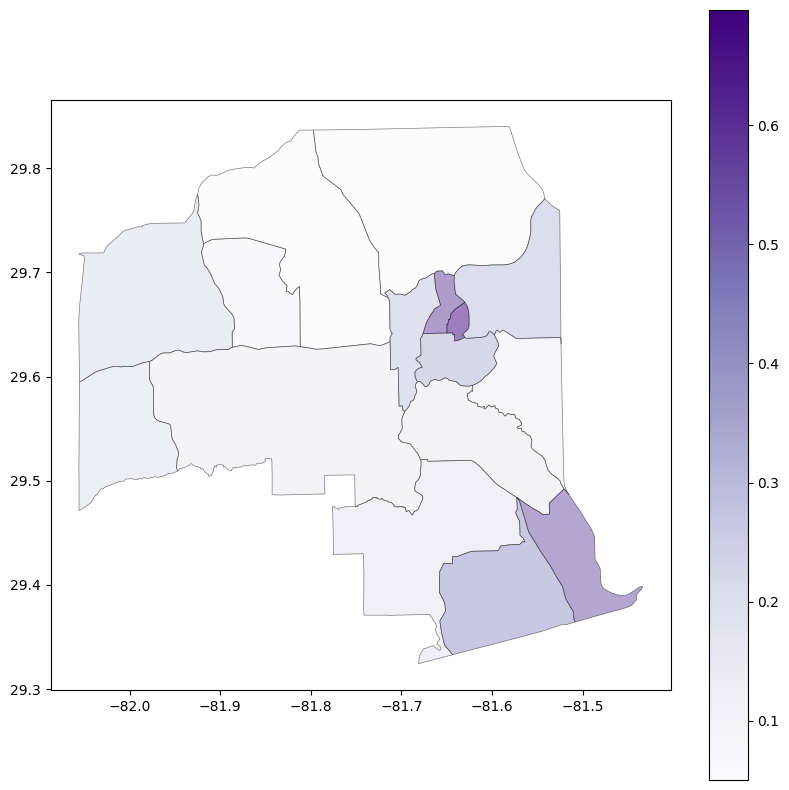

In [146]:
tracts_2010_merge.plot(column='black_and_hisp_prop', cmap='Purples', legend=True, figsize=(10, 10), edgecolor='black', linewidth=0.5, alpha=0.5)

In [147]:
# Calculate sums
sums = tracts_2010_merge[['P0010001', 'abpop', 'aapop', 'hpop', 'anapop', 'opop', 'wpop']].sum()

# Calculate proportions
proportions = round((sums / sums['P0010001'])*100, 2)

# Display results
print("Sums:")
print(sums)
print("\nProportions:")
print(proportions)

Sums:
P0010001    74364
abpop       12574
aapop         611
hpop         6442
anapop        656
opop          100
wpop        53981
dtype: int64

Proportions:
P0010001    100.00
abpop        16.91
aapop         0.82
hpop          8.66
anapop        0.88
opop          0.13
wpop         72.59
dtype: float64


In [148]:
tracts_2010_merge[['P0010001', 'abpop', 'aapop', 'hpop', 'anapop', 'opop', 'wpop']].sum(axis=0)

P0010001    74364
abpop       12574
aapop         611
hpop         6442
anapop        656
opop          100
wpop        53981
dtype: int64

### 2020

In [149]:
tracts_2020 = tracts_2020[tracts_2020['COUNTYFP20'] == '107']
pl_2020['TRACT'] = pl_2020['TRACT'].astype(str).str.zfill(6)

In [150]:
# black alone or in combination (32 categories)
black_demo_cols = ['P0010004', 'P0010011', 'P0010016', 'P0010017', 'P0010018', 'P0010019', 'P0010027', 'P0010028', 'P0010029', 'P0010030', \
'P0010037', 'P0010038', 'P0010039', 'P0010040', 'P0010041', 'P0010042',  'P0010048', 'P0010049', 'P0010050', 'P0010051', \
'P0010052', 'P0010053', 'P0010058', 'P0010059', 'P0010060', 'P0010061', 'P0010064', 'P0010065', 'P0010066', 'P0010067', 'P0010069', 'P0010071']

pl_2020['abpop'] = pl_2020[black_demo_cols].sum(axis=1)

nh_black_demo_cols = ['P0020006', 'P0020013', 'P0020018', 'P0020019', 'P0020020', 'P0020021', 'P0020029', 'P0020030', 'P0020031', 'P0020032', \
'P0020039', 'P0020040', 'P0020041', 'P0020042', 'P0020043', 'P0020044',  'P0020050', 'P0020051', 'P0020052', 'P0020053', \
'P0020054', 'P0020055', 'P0020060', 'P0020061', 'P0020062', 'P0020063', 'P0020066', 'P0020067', 'P0020068', 'P0020069', 'P0020071', 'P0020073']

# hispanic or latino (not enumerated as black)
pl_2020['hpop'] = pl_2020['P0020002'] - ( 
  pl_2020[black_demo_cols].sum(axis=1) \
  - pl_2020[nh_black_demo_cols].sum(axis=1)
)

nh_asian_demo_cols = ['P0020008', 'P0020015', 'P0020022' , 'P0020025', 'P0020026', 'P0020033', 'P0020036', 'P0020037', 'P0020045',\
  'P0020046','P0020048','P0020056','P0020057','P0020059','P0020064', 'P0020070',\
    'P0020009', 'P0020016', 'P0020023', 'P0020027', 'P0020034', 'P0020038', 'P0020047', 'P0020058']
pl_2020['aapop'] = pl_2020[nh_asian_demo_cols].sum(axis=1)

# native american alone or in combination (not enumerated as black, asian or hispanic)
pl_2020['anapop'] = pl_2020[['P0020007', 'P0020014', 'P0020024', 'P0020035']].sum(axis=1)

# other race (not enumerated as black, asian, hispanic, or native american)
pl_2020['opop'] = pl_2020[['P0020010', 'P0020017']].sum(axis=1)

# white 
pl_2020['wpop'] = pl_2020['P0020005']


In [151]:
pl_2020 = pl_2020[['GEOID20', 'TRACT', 'P0010001', 'abpop', 'aapop', 'hpop', 'anapop', 'opop', 'wpop']]

In [152]:
pl_2020['black_and_hisp_prop'] = pl_2020[[ 'abpop','hpop']].sum(axis=1)/pl_2020['P0010001']
pl_2020['black_and_hisp_prop'] = pl_2020['black_and_hisp_prop'].fillna(0)

In [153]:
tracts_2020['TRACTCE20'] = tracts_2020['TRACTCE20'].astype(str).str.zfill(6)

In [154]:
tracts_2020_merge = tracts_2020.merge(pl_2020, how="left", on = "GEOID20")

<Axes: >

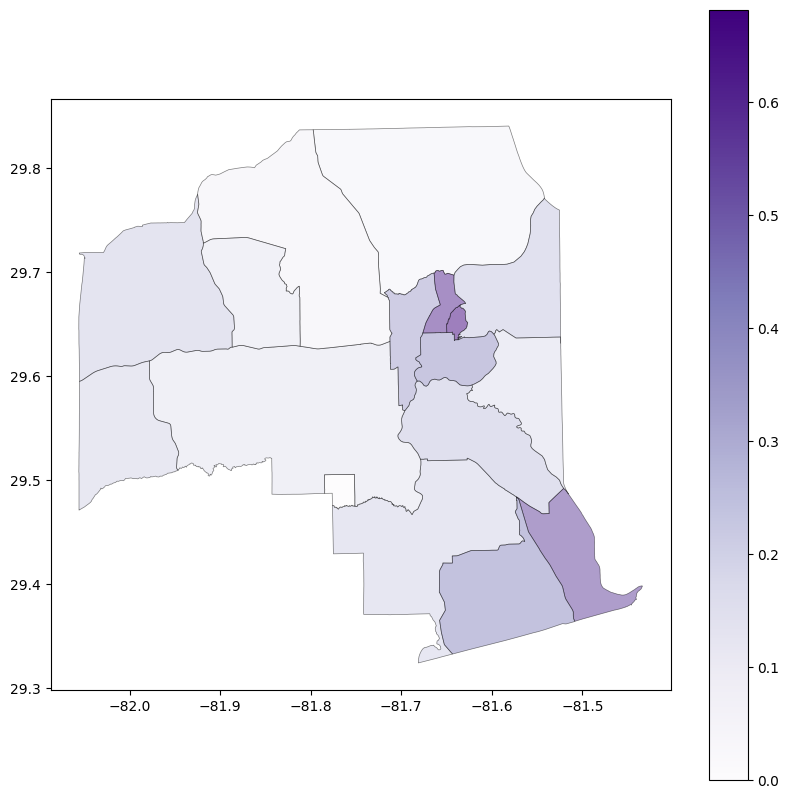

In [155]:
tracts_2020_merge.plot(column='black_and_hisp_prop', cmap='Purples', legend=True, figsize=(10, 10), edgecolor='black', linewidth=0.5, alpha=0.5)

In [ ]:
tracts_2020_merge['black_and_hisp_prop'].sort_values(ascending=False).head(2)

2    0.682236
8    0.610268
Name: black_and_hisp_prop, dtype: float64

In [162]:
tracts_2020_merge[tracts_2020_merge.black_and_hisp_prop.isin(tracts_2020_merge['black_and_hisp_prop'].sort_values(ascending=False).head(2).tolist())]

,STATEFP20,COUNTYFP20,TRACTCE20,GEOID20,NAME20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,...,abpop,aapop,hpop,anapop,opop,wpop,black_and_hisp_prop,bin,color,wprop
2,12,107,950800,12107950800,9508,Census Tract,G5020,S,5063917,3811,...,1814,20,114,36,17,825,0.682236,1.0,#fcbba1,0.291932
8,12,107,950700,12107950700,9507,Census Tract,G5020,S,10473364,3834680,...,2169,45,244,31,27,1438,0.610268,1.0,#fcbba1,0.363682


/var/folders/qc/7bpz4_qs0d1bhfr294bnmr_c0000gn/T/ipykernel_6477/3893959809.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('YlGnBu', 5)


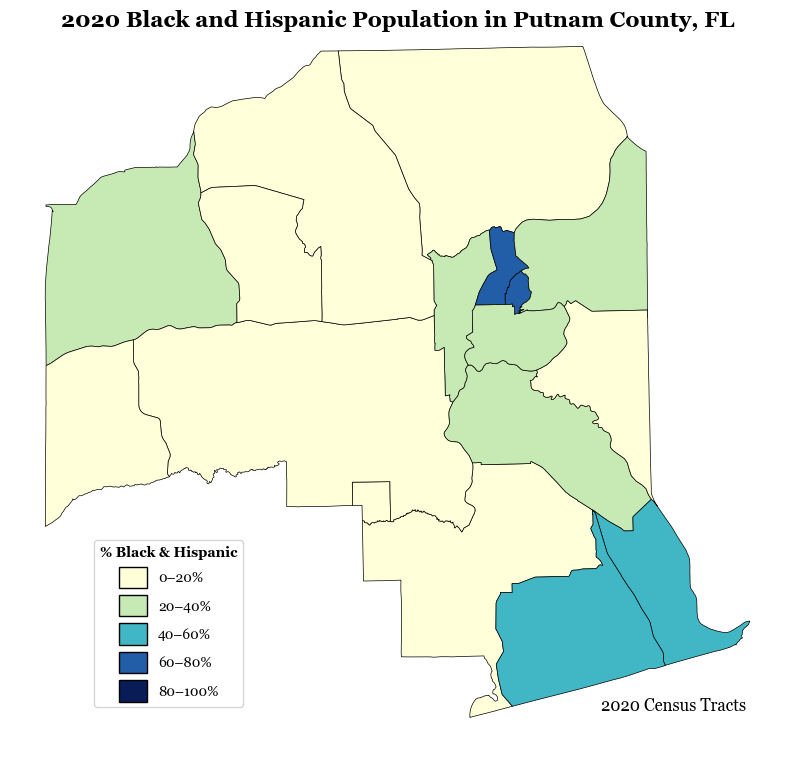

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.colors as mcolors

bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

cmap = plt.cm.get_cmap('YlGnBu', 5)
colors = [mcolors.to_hex(cmap(i)) for i in range(cmap.N)]

tracts_2020_merge['bin'] = pd.cut(tracts_2020_merge['black_and_hisp_prop'], bins=bins, labels=False, include_lowest=True)

tracts_2020_merge['color'] = tracts_2020_merge['bin'].apply(lambda x: colors[int(x)] if pd.notnull(x) else '#ffffff')

fig, ax = plt.subplots(figsize=(10, 10))
tracts_2020_merge.plot(
    color=tracts_2020_merge['color'],
    edgecolor='black',
    linewidth=0.5,
    alpha=1,
    legend=False,
    ax=ax
)


labels = ['0–20%', '20–40%', '40–60%', '60–80%', '80–100%']
patches = [Patch(facecolor=colors[i], edgecolor='black', label=labels[i]) for i in range(len(colors))]
ax.legend(
    prop={'family': 'Georgia'},
    title_fontproperties={'family': 'Georgia','weight':'bold'},
    handles=patches, 
    title="% Black & Hispanic", 
    loc='lower left',
    bbox_to_anchor=(.1, .05), 
    markerscale=3, 
    handleheight=2)

ax.set_title("2020 Black and Hispanic Population in Putnam County, FL", fontweight='bold', fontsize=16, family='Georgia', y=0.97)

plt.text(0.95, 0.05, "2020 Census Tracts", ha='right', va='bottom', transform=ax.transAxes, fontsize=12, family='Georgia')

ax.set_axis_off()

# plt.show()
plt.savefig('figs/prop_black_and_hispanic_2020.png', dpi=1200, bbox_inches='tight')



/var/folders/qc/7bpz4_qs0d1bhfr294bnmr_c0000gn/T/ipykernel_6477/3191077032.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Reds', 5)


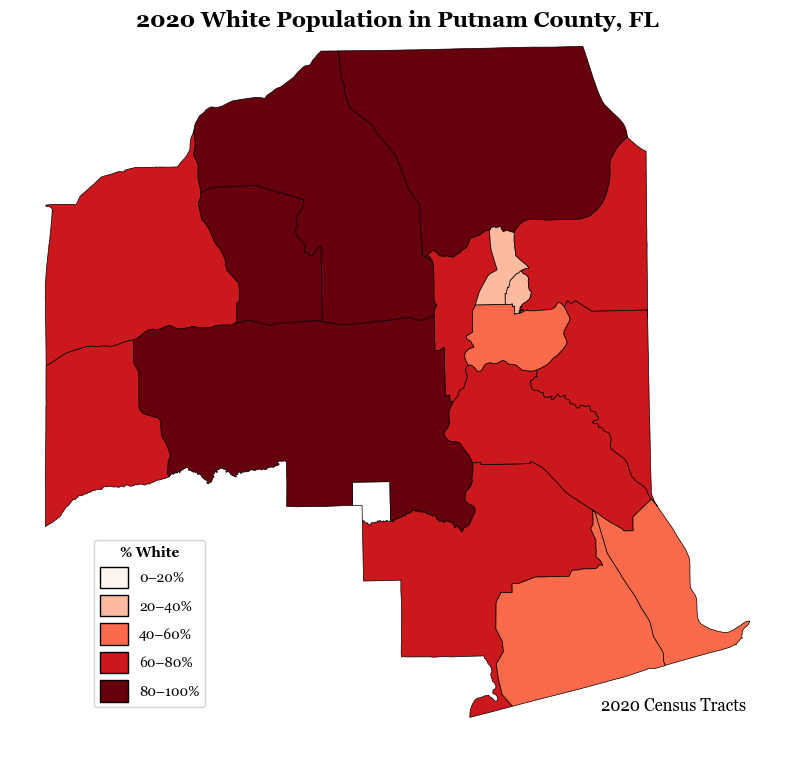

In [157]:
tracts_2020_merge['wprop'] = tracts_2020_merge['wpop']/tracts_2020_merge['P0010001']

cmap = plt.cm.get_cmap('Reds', 5)  
colors = [mcolors.to_hex(cmap(i)) for i in range(cmap.N)] 

tracts_2020_merge['bin'] = pd.cut(tracts_2020_merge['wprop'], bins=bins, labels=False, include_lowest=True)

tracts_2020_merge['color'] = tracts_2020_merge['bin'].apply(lambda x: colors[int(x)] if pd.notnull(x) else '#ffffff')

fig, ax = plt.subplots(figsize=(10, 10))
tracts_2020_merge.plot(
    color=tracts_2020_merge['color'],
    edgecolor='black',
    linewidth=0.5,
    alpha=1,
    legend=False,
    ax=ax
)

# Add custom legend
labels = ['0–20%', '20–40%', '40–60%', '60–80%', '80–100%']
patches = [Patch(facecolor=colors[i], edgecolor='black', label=labels[i]) for i in range(len(colors))]
ax.legend(
    prop={'family': 'Georgia'},
    title_fontproperties={'family': 'Georgia','weight':'bold'},
    handles=patches, 
    title="% White", 
    loc='lower left',
    bbox_to_anchor=(.1, .05), 
    markerscale=3, 
    handleheight=2)

ax.set_title("2020 White Population in Putnam County, FL", fontweight='bold', fontsize=16, family='Georgia', y=0.97)

plt.text(0.95, 0.05, "2020 Census Tracts", ha='right', va='bottom', transform=ax.transAxes, fontsize=12, family='Georgia')

ax.set_axis_off()

# plt.show()
plt.savefig('figs/prop_white_2020.png', dpi=1200, bbox_inches='tight')

